# Pune House Prices Data Analysis

 **This project focuses primarily on the analysis and understanding of the data related to Pune House Prices. Also, it predicts house prices in Pune based on various features such as area, square footage, number of bedrooms, number of bathrooms, year built, and whether the house has a garage.**

**Table of Contents**

1. [Data Preprocessing](#data-preprocessing)
   - [Loading the Dataset](#loading-the-dataset)
   - [Data Inspection](#data-inspection)
   - [Feature Engineering](#feature-engineering)
2. [Feature Selection](#feature-selection)
   - [Selecting Features and Labels](#selecting-features-and-labels)
   - [Feature Scaling](#feature-scaling)     
3. [Data Visualization](#data-visualization)
   - [Heatmap of Correlation Matrix](#heatmap-of-correlation-matrix)
   - [Barplot Showing Number of Houses Built in Each Year](#barplot-showing-number-of-houses-built-in-each-year)
   - [Grid Chart Showing 4 Scatter Plots](#grid-chart-showing-4-scatter-plots)
   - [Pie Chart Showing Housing Distribution by Area](#pie-chart-showing-housing-distribution-by-area)
   - [Lineplot Showing House Prices for the Initial 100 Records](#lineplot-showing-house-prices-for-the-initial-100-records)
4. [Model Training](#model-training)
   - [Splitting the Data](#splitting-the-data)
   - [Creating an Instance of the LinearRegression Model](#creating-an-instance-of-the-linearregression-model)
   - [Fitting the Model on the Training Data](#fitting-the-model-on-the-training-data)
   - [Predicting Values on the Test Set](#predicting-values-on-the-test-set)
   - [Model Evaluation](#model-evaluation)
   - [Predicting House Prices Based on User Input](#house_prices_prediction)
5. [Insights from Model Predictions](#insights-from-model-predictions)
   - [Actual vs. Predicted House Prices](#actual-vs-predicted-house-prices)
   - [Residual Plot](#residual-plot)
   - [Distribution of Predicted Values](#distribution-of-predicted-values)


### *Importing necessary libraries*

In [25]:
# Importing numpy for numerical operations
import numpy as np  

# Importing pandas for data manipulation and analysis
import pandas as pd 

# Importing matplotlib for creating visualizations
import matplotlib.pyplot as plt 

# Importing seaborn for creating complex data visualizations, built on top of matplotlib
import seaborn as sns 

# Importing LinearRegression model from sklearn for building a linear regression model
from sklearn.linear_model import LinearRegression 

# Importing metrics from sklearn for evaluating model performance
from sklearn.metrics import root_mean_squared_error, r2_score 

# Importing train_test_split from sklearn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split  

# Importing StandardScaler from sklearn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler


## 1. Data Preprocessing
<a id ="data-preprocessing"></a>

<a id="loading-the-dataset"></a>
- ### Loading the Dataset:
  
Loading the Pune house prices dataset into a pandas DataFrame.

In [26]:
df = pd.read_csv('pune_house_prices.csv')

<a id="data-inspection"></a>
- ### Data Inspection:

In [27]:
# Displaying the first few rows of the dataset
print("First few values: ")
df.head()

First few values: 


,id,area,square_feet,num_bedrooms,num_bathrooms,year_built,has_garage,price
0,1,Viman Nagar,1521,1,1,2016,0,4315847
1,2,Kalyani Nagar,2957,1,2,2003,1,12861115
2,3,Pimpri-Chinchwad,2816,3,2,1993,0,8615274
3,4,Kalyani Nagar,2869,3,1,2000,1,5360008
4,5,Kalyani Nagar,1285,3,3,2012,0,6412778


In [28]:
# Displaying the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             100000 non-null  int64 
 1   area           100000 non-null  object
 2   square_feet    100000 non-null  int64 
 3   num_bedrooms   100000 non-null  int64 
 4   num_bathrooms  100000 non-null  int64 
 5   year_built     100000 non-null  int64 
 6   has_garage     100000 non-null  int64 
 7   price          100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [29]:
# Counting the number of null values in each column
print("No. of null values: \n")
print(df.isnull().sum())

No. of null values: 

id               0
area             0
square_feet      0
num_bedrooms     0
num_bathrooms    0
year_built       0
has_garage       0
price            0
dtype: int64


Since there are no null values in the dataset, there is no need to remove any columns.

<a id="feature-engineering"></a>
- ### Feature Engineering:
Creating age of the house as a new feature.

In [30]:
# Calculate the age of the house
df['house_age'] = 2024 - df['year_built']

<a id="feature-selection"></a>
## 2. Feature Selection
<a id="selecting-features-and-labels"></a>
- ### Selecting Features and Labels:
    Define the features (independent variables) and the label (dependent variable) for prediction.

In [31]:
# Features: All columns except 'id', 'area' and 'price'
features = df.drop(columns=['id', 'area', 'price'])
labels = df['price']

<a id="feature-scaling"></a>
- ### Feature Scaling:
Standardize or normalize the features to improve model performance.

In [32]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

<a id="data-visualization"></a>
## 3. Data Visualization

<a id="heatmap-of-correlation-matrix"></a>
### Heatmap of Correlation Matrix
**Purpose:** To understand the relationships between different features and the target variable. This helps in identifying which features are most strongly correlated with house prices.

Text(0.5, 1.0, '\nHeatmap of Correlation Matrix\n')

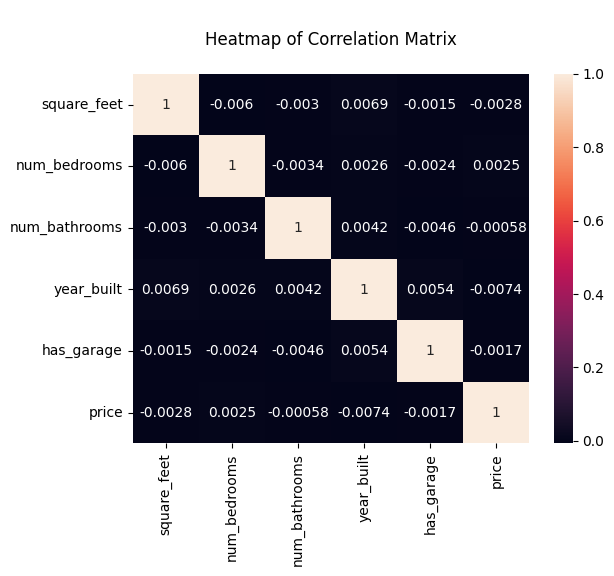

In [33]:
# Creating a heatmap of the correlation matrix for selected features in the DataFrame
# annot=True adds correlation coefficients to the heatmap cells

sns.heatmap(df[['square_feet','num_bedrooms','num_bathrooms','year_built','has_garage','price']].corr(),annot=True)
plt.title('\nHeatmap of Correlation Matrix\n')

In this heatmap, no strong correlations are evident between features, suggesting that the variables are not highly interdependent. 

<a id="barplot-showing-number-of-houses-built-in-each-year"></a>
### Barplot for Showing Number of Houses Built in Each Year
**Purpose**: To see how the number of houses built varies over the years.

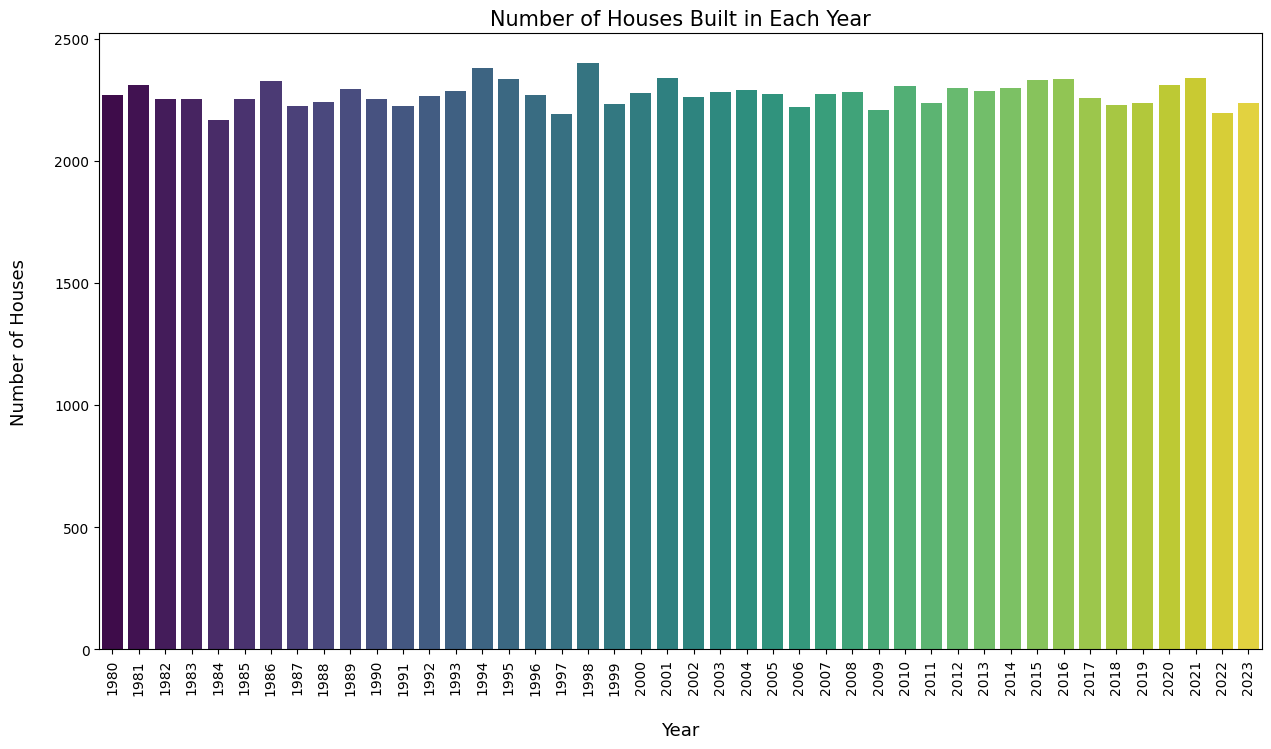

In [34]:
# Count the number of houses built in each year
year_counts = df['year_built'].value_counts()

# Create a DataFrame from the year counts for better plotting
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ['Year', 'Count']

# Create a bar plot for the counts
plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='Count', hue='Year', data=year_counts_df, palette='viridis',legend=False)
plt.xticks(rotation=90)
plt.title('Number of Houses Built in Each Year',fontsize=15)
plt.xlabel('\nYear',fontsize=13)
plt.ylabel('Number of Houses\n',fontsize=13)
plt.show()

This bar plot shows that the year 1998 has the highest number of houses built, indicating a peak in construction activity during that period. This trend could be influenced by various factors such as economic conditions, government policies, or urban development projects. 

<a id="grid-chart-showing-4-scatter-plots"></a>
### Grid Chart Showing 4 Scatter Plots
**Purpose:** To visualize the relationships between various features (square_feet, num_bedrooms, num_bathrooms, house_age) and house prices.

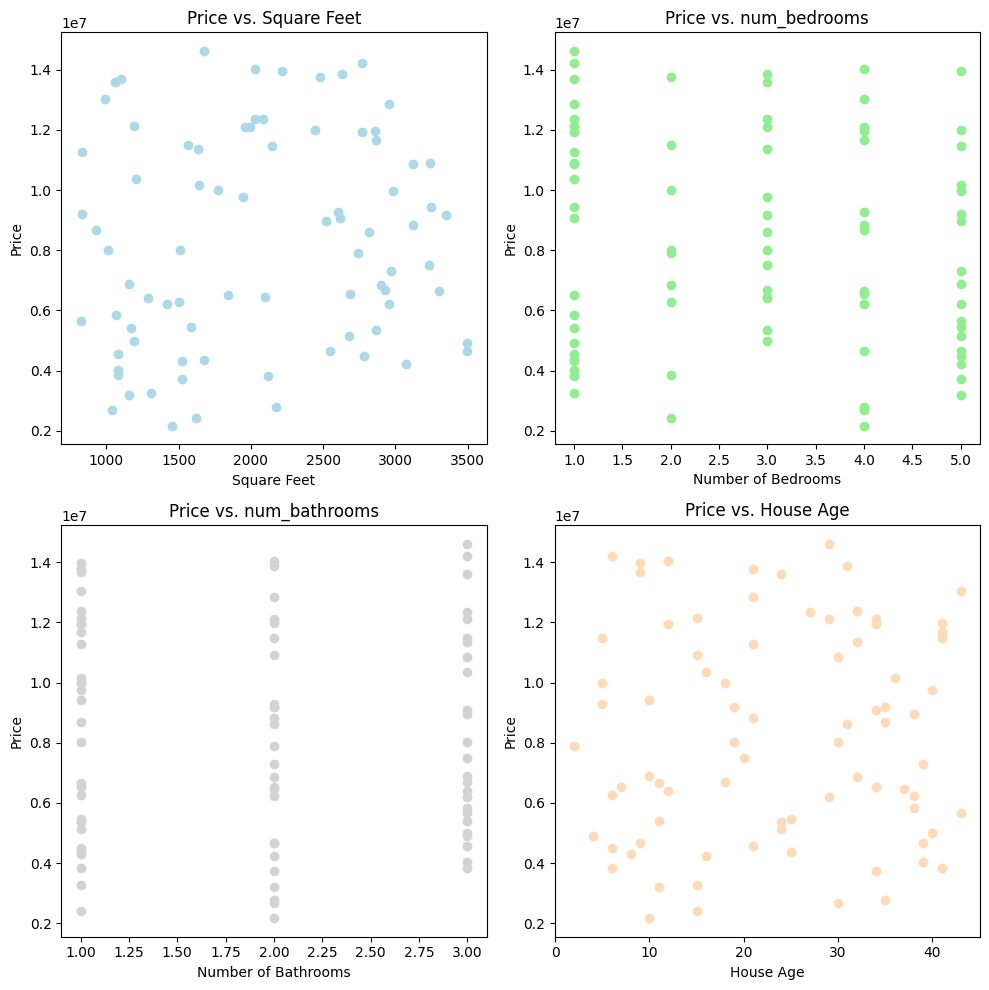

In [35]:
#Scatter Plots of Key Features vs. House Prices

# Declaration to create a 2x2 grid of subplots with a figure size of 10x10 inches
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Slicing the first 80 rows of the DataFrame for visualization
sliced_data = df[:80]

# Plotting a scatter plot of 'square_feet' vs 'price' on the top-left subplot
axs[0, 0].scatter(sliced_data['square_feet'], sliced_data['price'], color='lightblue')
axs[0, 0].set_title('Price vs. Square Feet')
axs[0, 0].set_xlabel('Square Feet')
axs[0, 0].set_ylabel('Price')

# Plotting a scatter plot of 'num_bedrooms' vs 'price' on the top-right subplot
axs[0, 1].scatter(sliced_data['num_bedrooms'], sliced_data['price'], color='lightgreen')
axs[0, 1].set_title('Price vs. num_bedrooms')
axs[0, 1].set_xlabel('Number of Bedrooms')
axs[0, 1].set_ylabel('Price')

# Plotting a scatter plot of 'num_bathrooms' vs 'price' on the bottom-left subplot
axs[1, 0].scatter(sliced_data['num_bathrooms'], sliced_data['price'], color='lightgray')
axs[1, 0].set_title('Price vs. num_bathrooms')
axs[1, 0].set_xlabel('Number of Bathrooms')
axs[1, 0].set_ylabel('Price')

# Plotting a scatter plot of 'house_age' vs 'price' on the bottom-right subplot
axs[1, 1].scatter(sliced_data['house_age'], sliced_data['price'], color='peachpuff')
axs[1, 1].set_title('Price vs. House Age')
axs[1, 1].set_xlabel('House Age')
axs[1, 1].set_ylabel('Price')

# Adjusting the layout to prevent overlapping of subplots
plt.tight_layout()


The plots in this grid chart provide insights into how different features, such as square feet, number of bedrooms, number of bathrooms, and house age, correlate with house prices.

<a id="pie-chart-showing-housing-distribution-by-area"></a>
### Pie Chart for Showing Housing Distribution by Area
**Purpose:** To visualize the proportion of houses located in different areas. 

Text(0.5, 1.0, '\nProportion of Houses in Various Areas')

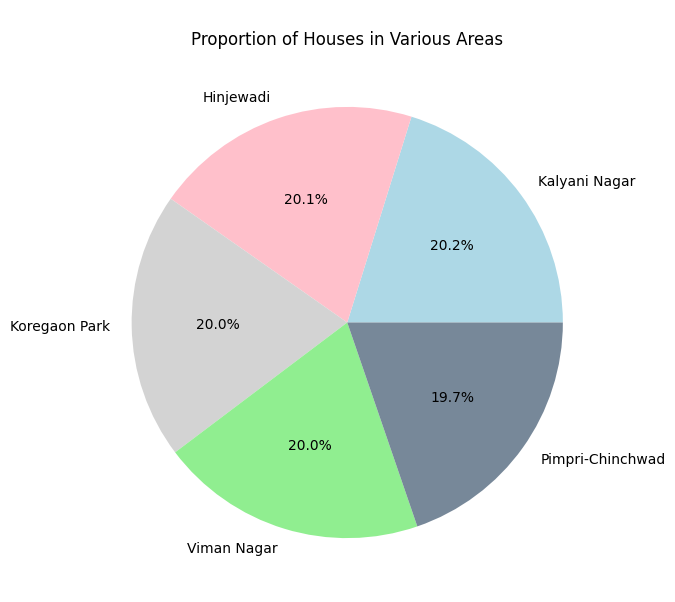

In [36]:
# Creating a pie chart with counts of each area, including percentage labels

plt.figure(figsize=(7,7))
area_count=df['area'].value_counts()  #will return count of each value within column
plt.xticks(rotation=90)
color=['lightblue','pink','lightgrey','lightgreen','lightslategrey']
plt.pie(area_count,labels=area_count.index,autopct='%1.1f%%',colors=color)
plt.title('\nProportion of Houses in Various Areas')

The pie chart shows that Kalyani Nagar has the highest share of houses, followed by Hinjewadi. Koregaon Park and Viman Nagar have equal percentages, while Pimpri-Chinchwad has the smallest share. 

<a id="lineplot-showing-house-prices-for-the-initial-100-records"></a>
### Lineplot Showing House Prices for the Initial 100 Records
**Purpose:** To visualize the trend in house prices for the first 100 records.

Text(0.5, 1.0, 'House Prices for the Initial 100 Records')

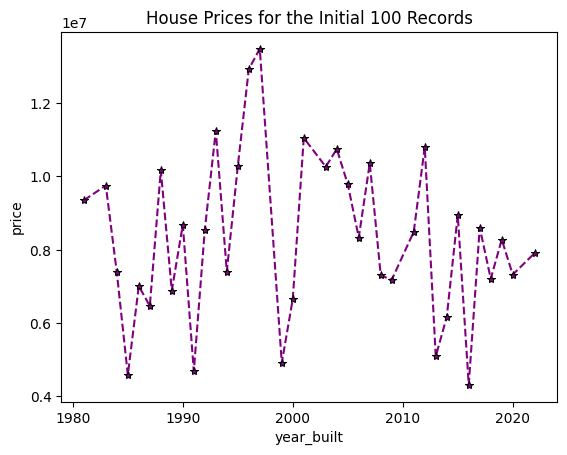

In [37]:
# Slicing the DataFrame to include only the first 100 records
sliced_df=df[:100]

# Creating a line plot of 'year_built' vs. 'price' for the sliced DataFrame
sns.lineplot(x='year_built',y='price',linestyle='dashed',marker='*',color='purple',markeredgecolor='black',data=sliced_df,errorbar=None)
plt.title('House Prices for the Initial 100 Records')

The line plot reveals that house prices peaked somewhere around 1998 among the initial 100 records. 

<a id="model-training"></a>
## 4. Model Training
<a id="splitting-the-data"></a>
- ### Splitting the Data:
    Split the dataset into training and testing sets.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

<a id="creating-an-instance-of-the-linearregression-model"></a>
- ### Creating an instance of the LinearRegression model:

In [39]:
model = LinearRegression()

<a id="fitting-the-model-on-the-training-data"></a>
- ### Fitting the model on the training data:

In [40]:
model.fit(X_train, y_train)

LinearRegression()

<a id="predicting-values-on-the-test-set"></a>
- ### Using the trained model to predict values on the test data:

In [41]:
y_pred = model.predict(X_test)

<a id="model-evaluation"></a>
- ### Model Evaluation:
Evaluate the model's performance using Root Mean Square Error (RMSE), and R² Score.

In [42]:
# Calculating the Root Mean Squared Error (RMSE) to measure the model's prediction error
rmse = root_mean_squared_error(y_test, y_pred)

# Calculating the R-squared score to evaluate the model performance
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')  

RMSE: 3743920.3504670104
R²: 1.6272539992701063e-05


The Root Mean Squared Error (RMSE) of the model is approximately 3,743,920, indicating a high level of prediction error. The R² value is extremely low at 1.63×10−51.63×10−5, suggesting that the model explains almost none of the variance in house prices. These metrics indicate that the model's performance is poor and may require significant improvement.

<a id="house_prices_prediction-"></a>
- ### Predicting House Prices Based on User Input:

In [43]:
def get_user_input():
    
    #Function to get user input for house features and return it as a DataFrame.

    try:
        # Prompting user for input and converting to appropriate data types
        square_feet = float(input("Enter square_feet: "))
        num_bedrooms = int(input("Enter num_bedrooms: "))
        num_bathrooms = int(input("Enter num_bathrooms: "))
        year_built = int(input("Enter year_built: "))
        has_garage = bool(int(input("Enter has_garage (1 for True, 0 for False): ")))
        house_age = int(input("Enter house_age (number of years since the house was built): "))

        # Creating a DataFrame from the user inputs
        return scaler.fit_transform(pd.DataFrame({'square_feet': [square_feet],
                             'num_bedrooms': [num_bedrooms],
                             'num_bathrooms': [num_bathrooms],
                             'year_built': [year_built],
                             'has_garage': [has_garage],
                             'house_age': [house_age]}))
    except ValueError:
        # Handling invalid input by prompting the user to enter the values again
        print("Invalid Input! Enter again")
        return get_user_input()

# Getting new data from user
new_data = get_user_input()

# Predicting the price using the trained model
new_prediction = model.predict(new_data)

# Displaying the predicted price
print("Predicted price is: ", new_prediction)


Predicted price is:  [8488906.06667929]


## 5. Insights from Model Predictions
<a id="insights-from-model-predictions"></a>

<a id="actual-vs-predicted-house-prices"></a>
### Actual vs Predicted House Prices
**Purpose:** To evaluate the performance of our predictive model by comparing actual prices with predicted prices.

Text(0.5, 1.0, 'Actual vs Predicted House Prices')

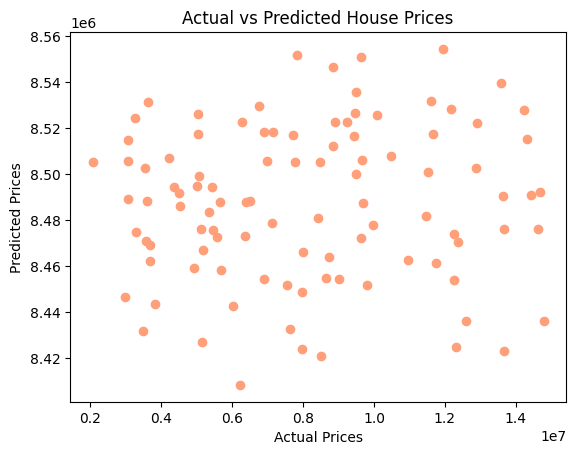

In [44]:
# Creating a scatter plot for the first 100 actual vs. predicted house prices

plt.scatter(y_test[:100],y_pred[:100],color='lightsalmon')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

The scatter plot shows a significant difference between the actual and predicted house prices, indicating that the model needs further refinement to improve accuracy.

<a id="residual-plot"></a>
### Residual Plot
**Purpose:** To assess the residuals of the model and check for patterns that might indicate model improvement areas.

Text(0, 0.5, 'Residuals\n')

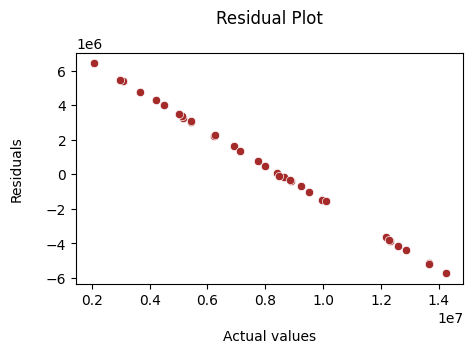

In [45]:
# Creating a scatter plot of the first 35 actual values vs. residuals (predicted - actual)

plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test[:35],y=y_pred[:35] - y_test[:35], color='brown')
plt.title('Residual Plot\n')
plt.xlabel('\nActual values')
plt.ylabel('Residuals\n')


The residual plot shows a decreasing trend in residuals as predicted prices increase. This suggests that the model's errors tend to be smaller for higher predicted prices, indicating that the model performs better for higher-priced houses.

<a id="distribution-of-predicted-values"></a>
### Distribution of Predicted Values
**Purpose:** To understand the distribution of the predicted house prices.

Text(0, 0.5, 'Frequency\n')

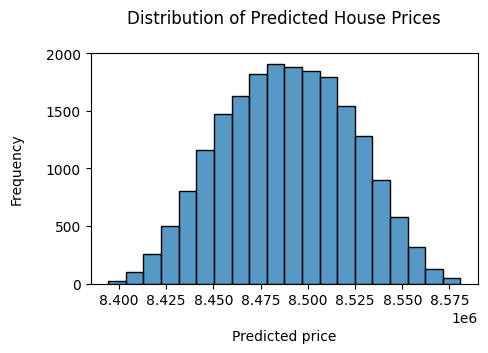

In [46]:
# Creating a histogram of predicted house prices with 20 bins

plt.figure(figsize=(5,3))
sns.histplot(y_pred,bins=20)
plt.title('Distribution of Predicted House Prices\n')
plt.xlabel('\nPredicted price')
plt.ylabel('Frequency\n')

Hist plot shows the most of the predicted values fall near the median|of the distribution.